# import Setting

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# HW 2-1 
- Power Law Transformation

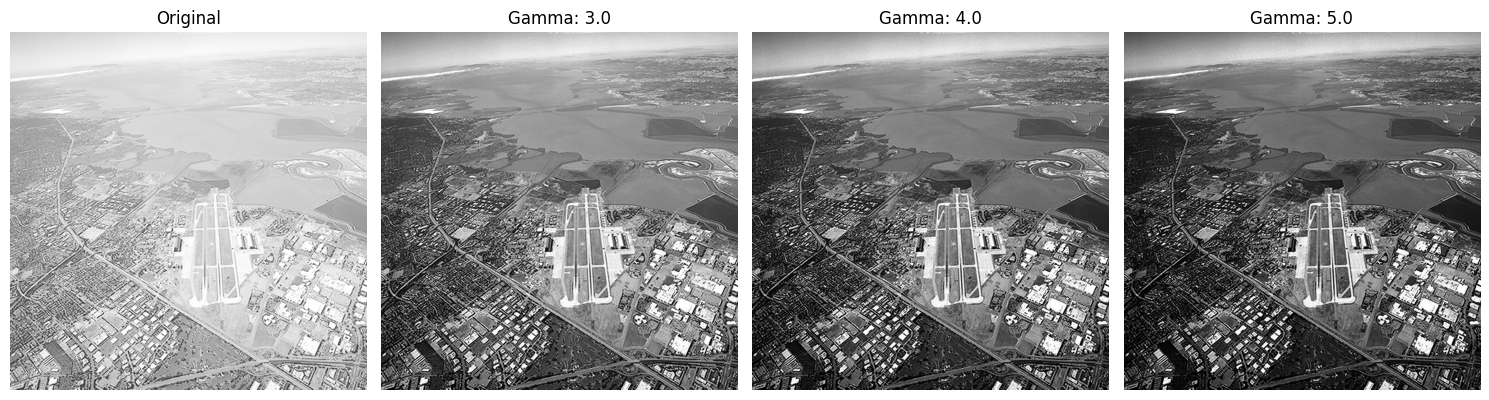

In [ ]:

def power_law_transform(image_path, gammas, C=1.0):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_normalized = img / 255.0

    transformed_images = []

    for gamma in gammas:
        power_img = C * np.power(img_normalized, gamma)
        power_img_scaled = np.uint8(np.clip(power_img * 255, 0, 255))
        transformed_images.append((gamma, power_img_scaled))

    # 결과 출력
    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(gammas)+1, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    for i, (gamma, t_img) in enumerate(transformed_images):
        plt.subplot(1, len(gammas)+1, i+2)
        plt.imshow(t_img, cmap='gray')
        plt.title(f'Gamma: {gamma}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# 이미지 그리기
image_path = 'img\HW1.tif'  
gammas = [3.0, 4.0, 5.0]
power_law_transform(image_path, gammas)


# HW 2-2
- Piecewise-Linear Transformation

In [16]:
def piecewise_linear_transform(image, r1, s1, r2, s2):
    img = image.copy()
    lut = np.zeros(256, dtype=np.uint8)

    for r in range(256):
        if r < r1:
            lut[r] = int((s1 / r1) * r)
        elif r < r2:
            lut[r] = int(((s2 - s1) / (r2 - r1)) * (r - r1) + s1)
        else:
            lut[r] = int(((255 - s2) / (255 - r2)) * (r - r2) + s2)

    # 루크업 테이블로 변환
    transformed = lut[image]
    return transformed


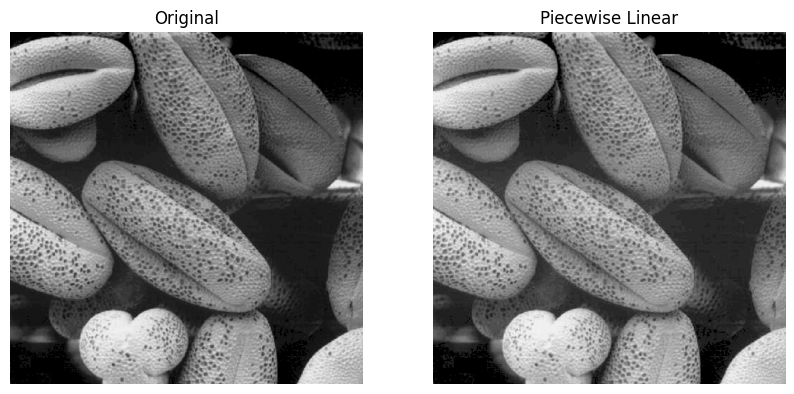

In [19]:

r1, s1 = 100, 100
r2, s2 = 2200, 1400

img = cv2.imread('img\HW2.tif', cv2.IMREAD_GRAYSCALE)
result = piecewise_linear_transform(img, r1, s1, r2, s2)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(result, cmap='gray')
plt.title('Piecewise Linear')
plt.axis('off')

plt.show()


# HW 2-3
- Piecewise-Linear Transformation

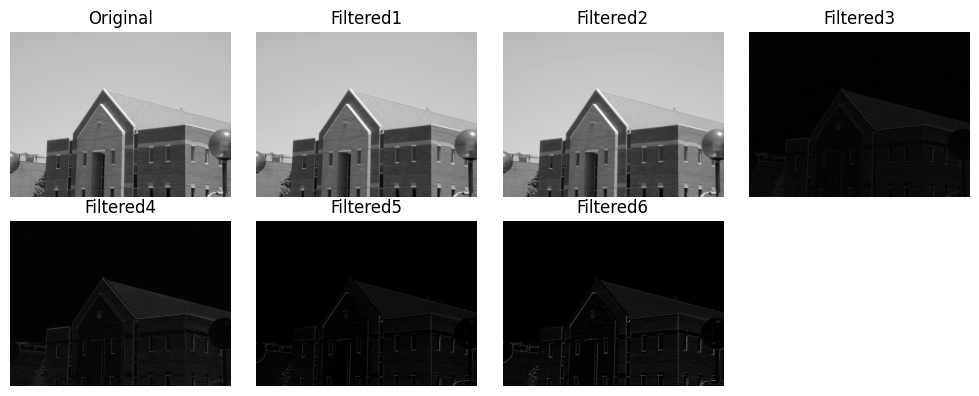

In [28]:
#이미지 입력
image = cv2.imread('img\HW3.jpg', cv2.IMREAD_GRAYSCALE)

# 컨볼루션 마스크 (샤프닝 예시)
kernel1 = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])
kernel2 = np.array([[0.0030, 0.0133, 0.0219,0.0133,0.0030],
                   [0.0133, 0.0596, 0.0983,0.0596,0.0133],
                   [0.0219,0.0983, 0.1621, 0.0983,0.0219],
                   [0.0133,0.0596, 0.0983, 0.0596,0.0133],
                   [0.0030,0.0133, 0.0219, 0.0133,0.0030]])
kernel3 = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])
kernel4 = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
kernel5 = np.array([[-1, 0, 0],
                   [0, 0, 0],
                   [0, 0, 1]])
kernel6 = np.array([[-1, -1, 0],
                   [-1, 0, 1],
                   [0, 1, 1]])

# 컨볼루션 적용
filtered_image1 = cv2.filter2D(image, -1, kernel1)
filtered_image2 = cv2.filter2D(image, -1, kernel2)
filtered_image3 = cv2.filter2D(image, -1, kernel3)
filtered_image4 = cv2.filter2D(image, -1, kernel4)
filtered_image5 = cv2.filter2D(image, -1, kernel5)
filtered_image6 = cv2.filter2D(image, -1, kernel6)
# 시각화
plt.figure(figsize=(10, 4))
plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(filtered_image1, cmap='gray')
plt.title("Filtered1")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(filtered_image2, cmap='gray')
plt.title("Filtered2")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(filtered_image3, cmap='gray')
plt.title("Filtered3")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(filtered_image4, cmap='gray')
plt.title("Filtered4")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(filtered_image5, cmap='gray')
plt.title("Filtered5")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(filtered_image6, cmap='gray')
plt.title("Filtered6")
plt.axis('off')
plt.tight_layout()
plt.show()





# HW 2-4
- Sobel-edge

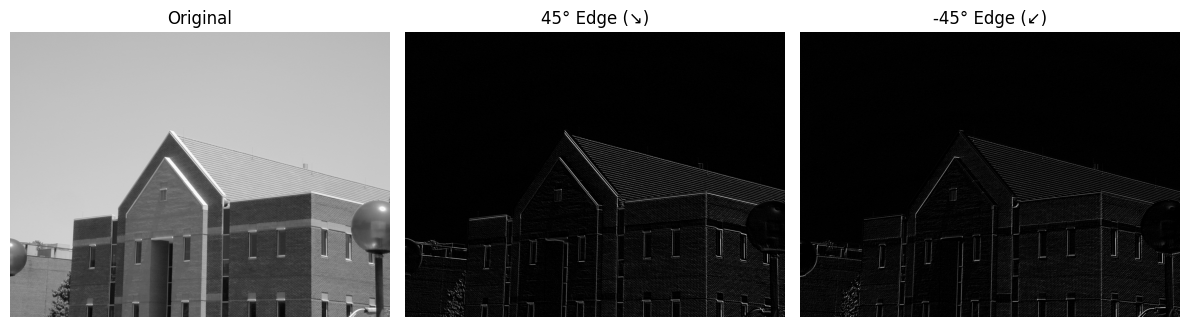

In [39]:
# 이미지 불러오기 (그레이스케일)
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기 (그레이스케일)
img = cv2.imread('img\HW3.jpg', cv2.IMREAD_GRAYSCALE)

# 45도 방향 마스크
kernel_45 = np.array([
    [ 0,  1,  1],
    [-1,  0,  1],
    [-1, -1,  0]
])

# -45도 방향 마스크
kernel_neg_45 = np.array([
    [-1, -1,  0],
    [-1,  0,  1],
    [ 0,  1,  1]
])

# Convolution 적용
edge_45 = cv2.filter2D(img, -1, kernel_45)
edge_neg_45 = cv2.filter2D(img, -1, kernel_neg_45)

# 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(edge_45, cmap='gray')
plt.title("45° Edge (↘)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(edge_neg_45, cmap='gray')
plt.title("-45° Edge (↙)")
plt.axis("off")

plt.tight_layout()
plt.show()


# HW 2-5
- Morphological Operations

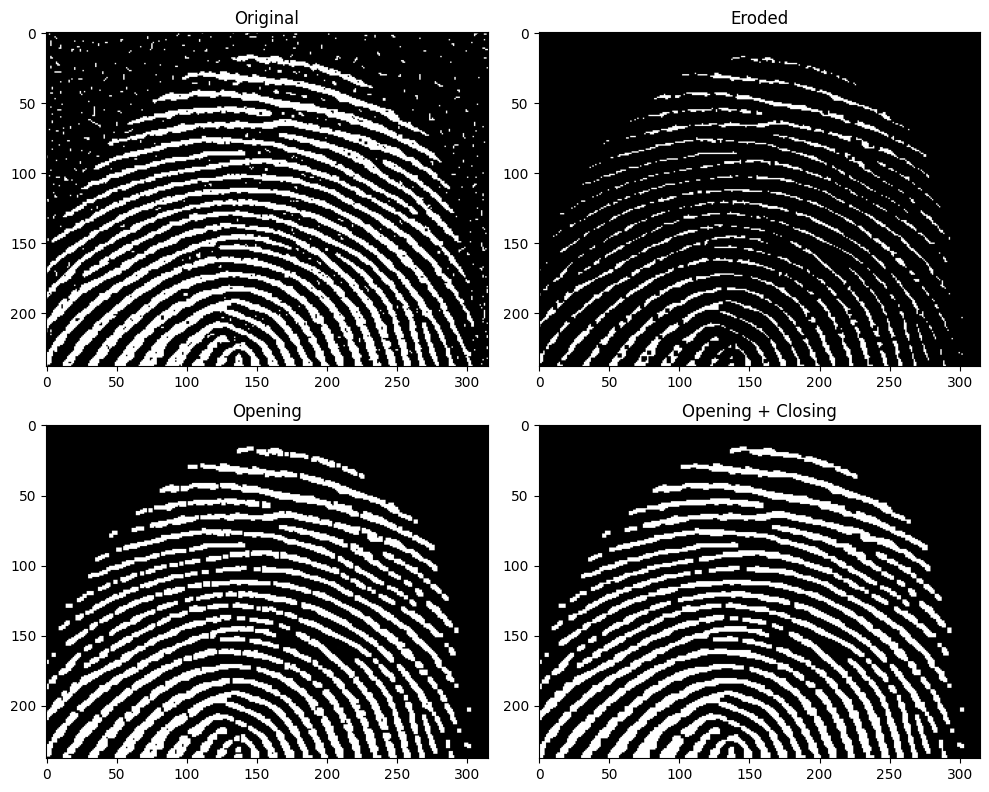

In [ ]:

# 이미지 불러오기 (Grayscale)
img = cv2.imread('img\HW5.jpg', cv2.IMREAD_GRAYSCALE)

# 커널 정의 (3x3 정사각형)
kernel = np.ones((3, 3), np.uint8)

# 1. Erosion (침식)
eroded = cv2.erode(img, kernel, iterations=1)

# 2. Opening (침식 후 팽창)
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# 3. Closing (팽창 후 침식)
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

# 시각화
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title("Eroded")

plt.subplot(2, 2, 3)
plt.imshow(opened, cmap='gray')
plt.title("Opening")

plt.subplot(2, 2, 4)
plt.imshow(closed, cmap='gray')
plt.title("Opening + Closing")

plt.tight_layout()
plt.show()


# HW 2-6
- Erosion

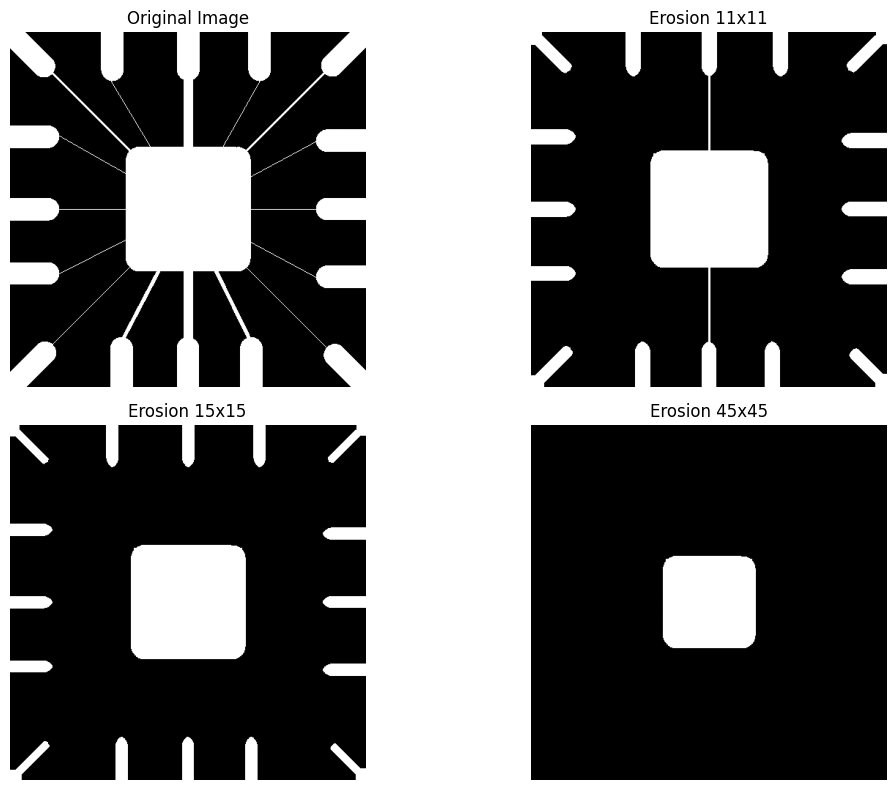

In [42]:

# 1. 이미지 불러오기 (그레이스케일)
img = cv2.imread('img\HW6.tif', cv2.IMREAD_GRAYSCALE)  # 파일명 필요시 수정

# 2. 각 커널 생성
kernel_11 = np.ones((11, 11), np.uint8)
kernel_15 = np.ones((15, 15), np.uint8)
kernel_45 = np.ones((45, 45), np.uint8)

# 3. 침식 연산 (Erosion)
eroded_11 = cv2.erode(img, kernel_11, iterations=1)
eroded_15 = cv2.erode(img, kernel_15, iterations=1)
eroded_45 = cv2.erode(img, kernel_45, iterations=1)

# 4. 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_11, cmap='gray')
plt.title("Erosion 11x11")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(eroded_15, cmap='gray')
plt.title("Erosion 15x15")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded_45, cmap='gray')
plt.title("Erosion 45x45")
plt.axis('off')

plt.tight_layout()
plt.show()


# HW 2-7
- Edge 검출 알고리즘

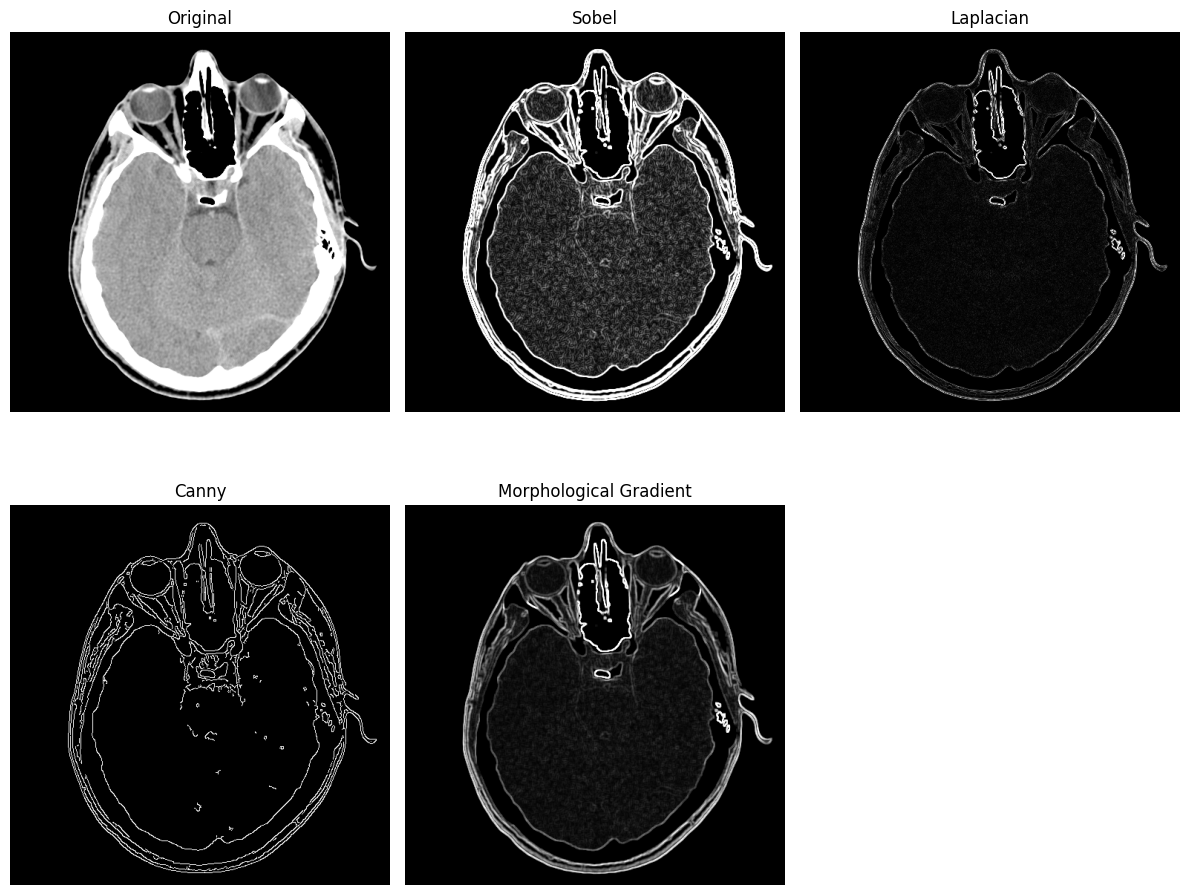

In [44]:
# 이미지 불러오기 (흑백)
img = cv2.imread('img\HW7.tif', cv2.IMREAD_GRAYSCALE)

# 1. Sobel Edge Detection (x, y 방향 합)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = np.uint8(np.clip(sobel, 0, 255))

# 2. Laplacian Edge Detection
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = np.uint8(np.clip(np.abs(laplacian), 0, 255))

# 3. Canny Edge Detection
canny = cv2.Canny(img, 100, 200)

# 4. Morphological Gradient
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(img, kernel)
eroded = cv2.erode(img, kernel)
morph_gradient = cv2.absdiff(dilated, eroded)

# 결과 시각화
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(sobel, cmap='gray')
plt.title("Sobel")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(canny, cmap='gray')
plt.title("Canny")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(morph_gradient, cmap='gray')
plt.title("Morphological Gradient")
plt.axis('off')

plt.tight_layout()
plt.show()

# HW 2-8
- Morphological Smoothing& Smoothing Filter


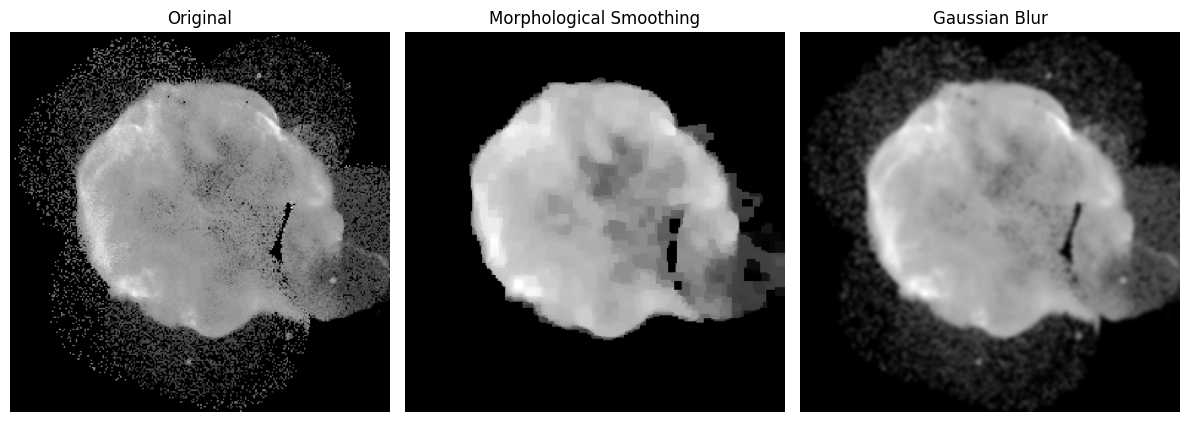

In [3]:
# 1. 이미지 불러오기 (흑백)
img = cv2.imread('img\HW8.tif', cv2.IMREAD_GRAYSCALE)

# 2. Morphological Smoothing (Opening + Closing)
kernel = np.ones((11, 11), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
morph_smooth = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# 3. Smoothing Filter (Gaussian Blur)
smooth_blur = cv2.GaussianBlur(img, (11, 11), 3)

# 4. 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(morph_smooth, cmap='gray')
plt.title("Morphological Smoothing")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(smooth_blur, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

plt.tight_layout()
plt.show()

# HW 2-9
- Ostu & Ostu+Top-hat

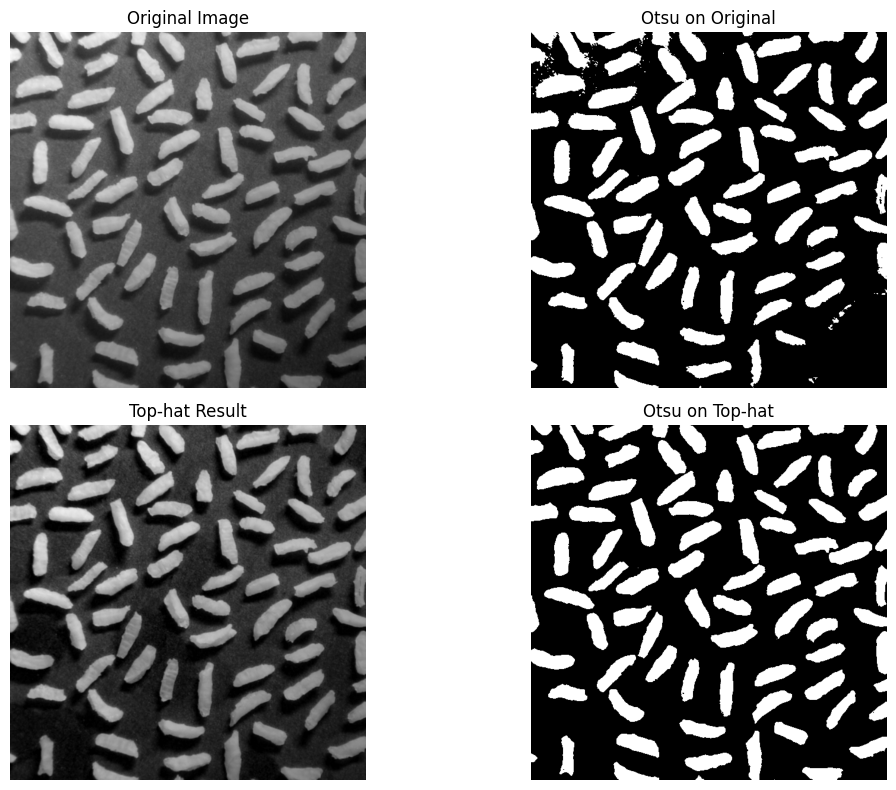

In [5]:
# 1. 이미지 불러오기 (흑백)
img = cv2.imread('img\HW9.tif', cv2.IMREAD_GRAYSCALE)

# 2. 디스크 모양의 구조 요소 생성 (반지름 40)
radius = 40
kernel_size = radius * 2 + 1
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

# 3. Opening 연산 → 배경 추출
background = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# 4. Top-hat 변환: 원본 - 배경
tophat = cv2.subtract(img, background)

# 5. Otsu 이진화 (원본에 바로)
_, otsu_orig = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 6. Otsu 이진화 (Top-hat 결과에)
_, otsu_tophat = cv2.threshold(tophat, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 7. 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(otsu_orig, cmap='gray')
plt.title("Otsu on Original")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(tophat, cmap='gray')
plt.title("Top-hat Result")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(otsu_tophat, cmap='gray')
plt.title("Otsu on Top-hat")
plt.axis('off')

plt.tight_layout()
plt.show()


# HW 10
- Morphological Segmentation

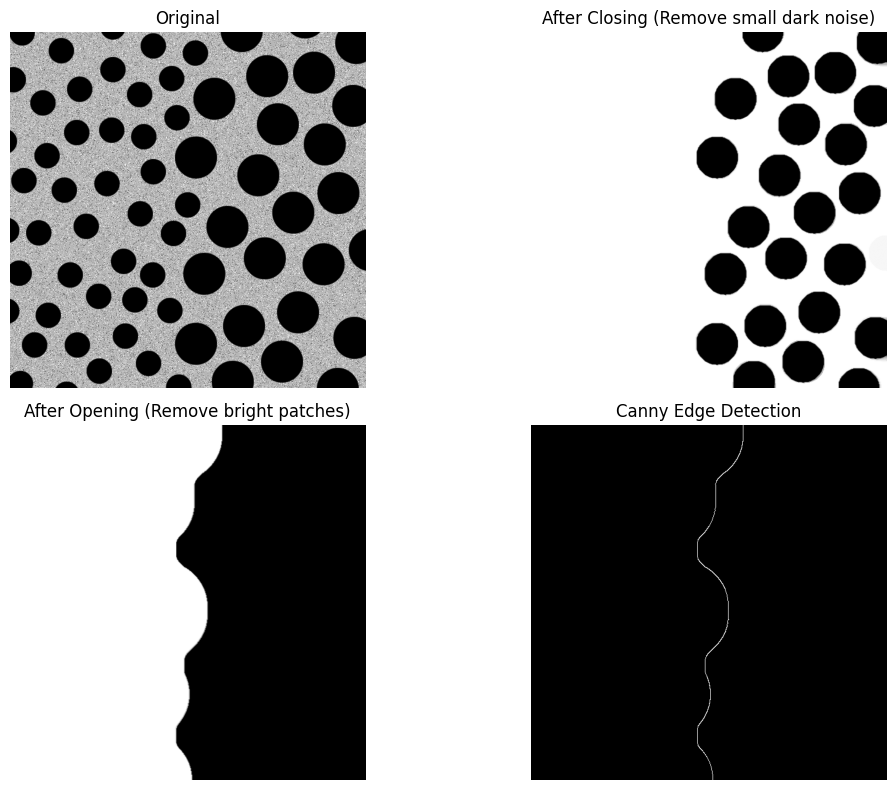

In [27]:
# 1. 이미지 불러오기
img = cv2.imread('img/HW10.tif', cv2.IMREAD_GRAYSCALE)

# 2. Morphological 연산으로 노이즈 제거
kernel_dark = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (60, 60))  # 작은 얼룩 제거용
kernel_bright = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (150, 150))  # 밝은 패치 제거용

# 2-1. 작은 어두운 얼룩 제거 (닫힘)
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_dark)

# 2-2. 밝은 부분 제거 (열림)
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel_bright)

# 3. Canny 경계 검출
# → Morph 연산으로 노이즈 제거한 후, 경계만 추출
edges = cv2.Canny(opened, 50, 150)

# 4. 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(closed, cmap='gray')
plt.title("After Closing (Remove small dark noise)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(opened, cmap='gray')
plt.title("After Opening (Remove bright patches)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()